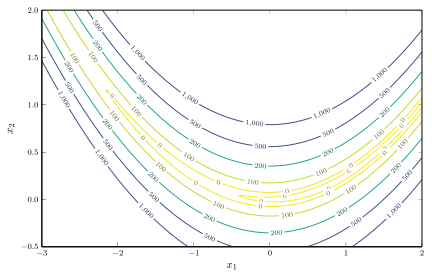

In [10]:
###################################################################################
using Plots, LaTeXStrings, Printf, LinearAlgebra, Dates
pgfplotsx() #pyplot()

# Rosenbrock function
fp(x1,x2) = (1 - x1)^2 + 100*(4x2 - x1^2)^2

x1 = -3:0.01:2
x2 = -0.5:0.01:2

pl1 = contour(x1, x2, fp, framestyle = :box,
    levels=[2,10,50,200,500, 1000], 
    c = cgrad(:viridis, [0.01, 0.02, 0.03], rev = true), 
    ylab = L"x_2", 
    xlab = L"x_1",
    xlims = (-3,2),
    ylims = (-0.5,2),
    legend = false,
    grid = false,
    contour_labels = true,
    bins = 150,
    label = false)

In [2]:
mutable struct Adagrad
    α # learning rate
    ϵ # small value
    s # sum of squared gradient
end

function step!(M::Adagrad, f, ∇f, x)
    α, ϵ, s, g = M.α, M.ϵ, M.s, ∇f(x)
    s[:] += g.*g
    return x - α*g ./ (sqrt.(s) .+ ϵ)
end

step! (generic function with 1 method)

In [3]:
# Mathematical expression
f = x -> (1-x[1])^2 + 100*(4x[2] - x[1]^2)^2
∇f = x -> [2*(200x[1]^3 - 800x[1]*x[2] + x[1] - 1), -800*(x[1]^2 - 4x[2])]

# Initial point
x0 = [-2,1.5]

2-element Array{Float64,1}:
 -2.0
  1.5

In [4]:
M = Adagrad(0.1, 1e-8, zeros(length(x0)))

Adagrad(0.1, 1.0e-8, [0.0, 0.0])

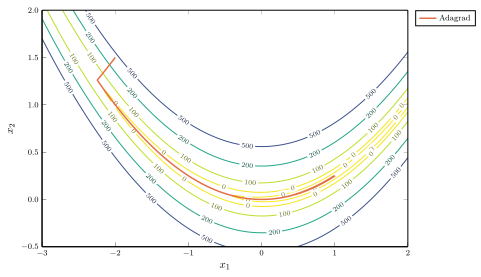

In [5]:
points = []
push!(points, (x0))
N = 100000

for i=1:N
    x = step!(M, f, ∇f, x0)
    x0 = x
    push!(points, (x0))
end

plot!([P[1] for P in points], [P[2] for P in points], label = "Adagrad", legend = true, lw = 1.5)

In [6]:
# Gradient descent
struct GradientDescent
    α
    end

function step!(M::GradientDescent, f, ∇f, x)
    α, g = M.α, ∇f(x)
    return x - α*g
end

step! (generic function with 2 methods)

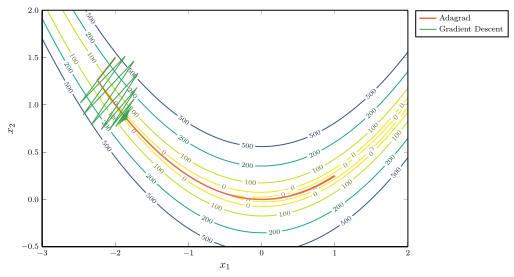

In [7]:
x0 = [-2,1.5]
points = []
push!(points, (x0))

M = GradientDescent(0.0003)

N = 40

for i=1:40
    x = step!(M, f, ∇f, x0)
    x0 = x
    push!(points, (x0))
end

plot!([P[1] for P in points], [P[2] for P in points], label = "Gradient Descent", legend = true)

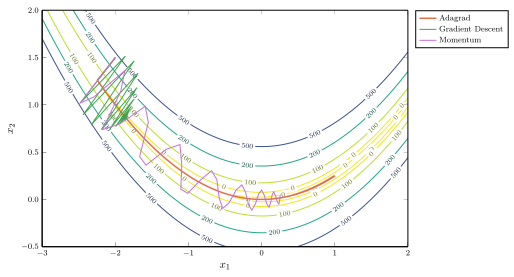

In [8]:
# Momentum Method
mutable struct Momentum
    α # learning rate
    β # momentum decay
    v # momentum
end

function step!(M::Momentum, f, ∇f, x)
    α, β, v, g = M.α, M.β, M.v, ∇f(x)
    v[:] = β*v - α*g
    return x + v
end

x0 = [-2,1.5]
points = []
push!(points, (x0))

M = Momentum(0.0003, 0.9, zeros(length(x0)))
N = 40

for i=1:40
    x = step!(M, f, ∇f, x0)
    x0 = x
    push!(points, (x0))
end

plot!([P[1] for P in points], [P[2] for P in points], label = "Momentum", legend = true)

In [9]:
savefig(pl1, "5.5 Adagrad.svg")